#### Impedindo notebook de escrever bytecode

In [13]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [14]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

In [4]:
dataset = PointDataset("./data.dat")
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults = CHclf.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)


#### Plotando classificador

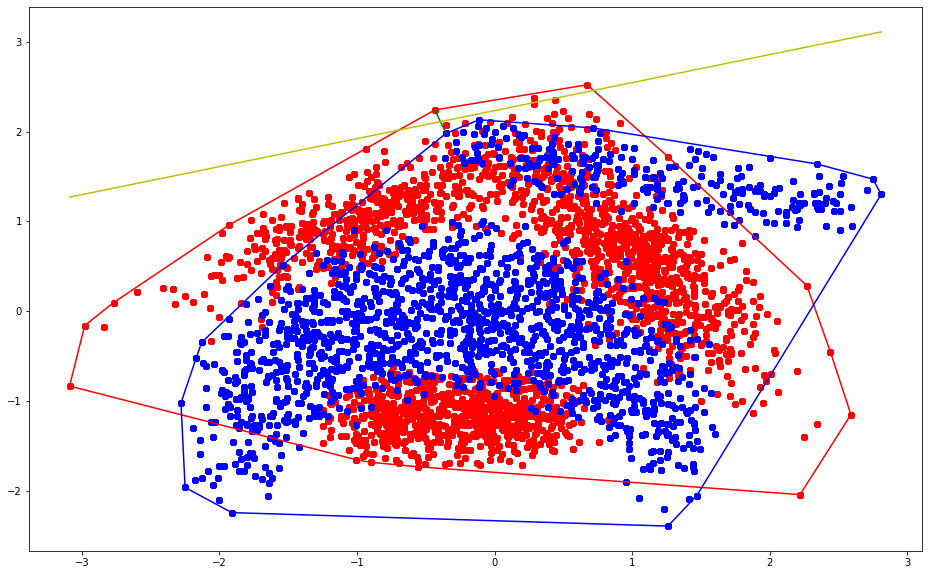

In [6]:
CHclf.plotHulls()

#### Checando separabilidade linear dos pontos

In [7]:
CHclf.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [8]:
CHresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,NaN,0.0,NaN,0.549258
1,0.0,0.0,NaN,0.574899
2,NaN,0.0,NaN,0.535762
3,NaN,0.0,NaN,0.580297
4,0.0,0.0,NaN,0.550607


#### Resultados do teste

In [9]:
CHresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.2,0.001353,0.2,0.533627


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [10]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

#### Resultados da validação cruzada com 5 folds

In [11]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.929878,0.854342,0.929878,0.898785
1,0.932886,0.847561,0.932886,0.905533
2,0.913907,0.841463,0.913907,0.894737
3,0.875399,0.869841,0.875399,0.892038
4,0.897516,0.881098,0.897516,0.902834


#### Resultados do teste

In [12]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.902299,0.873435,0.902299,0.900063
